# Phase 1 Project: Aviation Safety Analysis ***(Additional Notes)***

## Business Understanding
### Objective
The purpose of this project is to identify low-risk aircraft models and operational strategies to support the company's entry into the aviation sector.

### Key Deliverables
1. Recommendations for low-risk aircraft.
2. Insights into operational risks (e.g., flight phases, weather conditions).
3. Strategic guidance for improving safety in operations.

## Data Understanding

### Dataset Overview
- **Source**: National Transportation Safety Board (1962–2023)
- **Scope**: Aviation accidents and incidents across various models, flight phases, and weather conditions.

### Initial Observations
- The dataset contained missing values, mixed data types, and columns with varying relevance to the analysis.
- Preprocessing was needed to clean and prepare the data for meaningful analysis.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Try using an alternative encoding
Aviation_df = pd.read_csv('AviationData.csv', encoding='latin1')

# Preview the first few rows to ensure the file loaded correctly
Aviation_df

c:\Users\maktr\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


### **Calculating Missing Data**
- Goal is to calculate and see how much of the missing values each category in the dataset have.
- That way, we can determine which columns we should probably keep, remove, and such.

In [42]:
# Calculate missing values per column
missing_data = Aviation_df.isnull().sum()

# Calculate the percentage of missing data for each column
missing_percentage = (missing_data / len(Aviation_df)) * 100

# Combine into a single DataFrame for better readability
missing_summary = pd.DataFrame({
    "Missing Values": missing_data,
    "Percentage Missing (%)": missing_percentage
}).sort_values(by="Percentage Missing (%)", ascending=False)

# Display the summary
print("Summary of Missing Data:")
print(missing_summary)

Summary of Missing Data:
                        Missing Values  Percentage Missing (%)
Schedule                         76307               85.845268
Air.carrier                      72241               81.271023
FAR.Description                  56866               63.974170
Aircraft.Category                56602               63.677170
Longitude                        54516               61.330423
Latitude                         54507               61.320298
Airport.Code                     38640               43.469946
Airport.Name                     36099               40.611324
Broad.phase.of.flight            27165               30.560587
Publication.Date                 13771               15.492356
Total.Serious.Injuries           12510               14.073732
Total.Minor.Injuries             11933               13.424608
Total.Fatal.Injuries             11401               12.826109
Engine.Type                       7077                7.961615
Report.Status                 

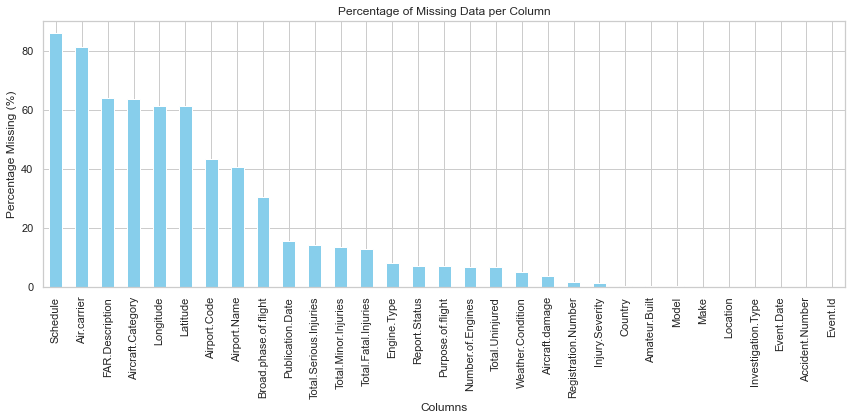

In [43]:
# Optional: Visualize missing data
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
missing_summary["Percentage Missing (%)"].plot(kind='bar', color='skyblue')
plt.title("Percentage of Missing Data per Column")
plt.ylabel("Percentage Missing (%)")
plt.xlabel("Columns")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Creation of new Column 'Total.Injured'

In [44]:
Aviation_df['Total.injured'] = Aviation_df['Total.Serious.Injuries'] +  Aviation_df['Total.Fatal.Injuries']



### **Data Analysis**
#### Analysis of Every Key Dataset and correlations to Injuries
- The goal was too analyize and see, based on each Data category, how much did each correlate to each number of injuries and non-injuries.
- In addition, most of the tables are sorted out by the number of times or moments this or that category was mentioned in the data set.



### Model

**Analysis from the Data Sets:**
- **Frequent Use, Low Injury Models:** Models like the 737 show that frequent use does not necessarily mean higher injury rates, which may reflect their overall robustness and safety.

- **Infrequent Use, High Injury Models:** The PA-28-181 and PA-28-180 show that even with fewer incidents, a higher injury rate signals a more dangerous model that might need better safety improvements or modifications.

- **Moderate Risk Models:** Aircraft like the 172 and PA-28-161 are moderately used and moderately risky, suggesting a balanced risk profile.

**Conclusion:** Ultimately, the number of incidents and injury percentages together provide a clearer picture of both the frequency and severity of incidents involving different aircraft models. Some models may benefit from additional safety measures, especially those with higher injury percentages, even if their usage is lower.

In [45]:
# Simplified Model_summary calculation
Model_summary = Aviation_df.groupby('Model').agg(
    Total_Injured=('Total.injured', 'sum'),
    Total_Uninjured=('Total.Uninjured', 'sum'),
    Total_Model=('Model', 'size')
)

# Calculate Injured and Non-injured Percentages
Model_summary['Injured Percentage (%)'] = Model_summary['Total_Injured'] / (Model_summary[['Total_Injured', 'Total_Uninjured']].sum(axis=1)) * 100
Model_summary['Non-injured Percentage (%)'] = Model_summary['Total_Uninjured'] / (Model_summary[['Total_Injured', 'Total_Uninjured']].sum(axis=1)) * 100


# Sort by 'Total_Model' and get top 20 models
top_20_models = Model_summary.sort_values('Total_Model', ascending=False).head(20)
top_20_models

,Total_Injured,Total_Uninjured,Total_Model,Injured Percentage (%),Non-injured Percentage (%)
Model,,,,,
152,540.0,2364.0,2367,18.595041,81.404959
172,657.0,2253.0,1756,22.577320,77.422680
172N,542.0,1350.0,1164,28.646934,71.353066
PA-28-140,515.0,844.0,932,37.895511,62.104489
150,225.0,763.0,829,22.773279,77.226721
172M,378.0,1095.0,798,25.661914,74.338086
172P,302.0,857.0,689,26.056946,73.943054
182,313.0,844.0,659,27.052723,72.947277
180,151.0,997.0,622,13.153310,86.846690


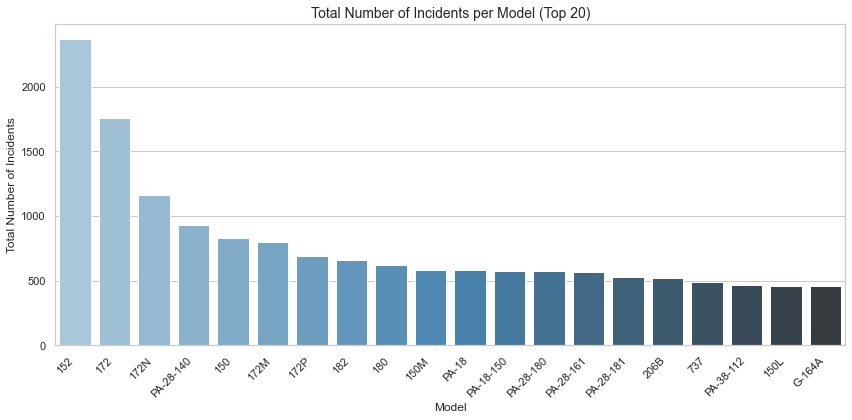

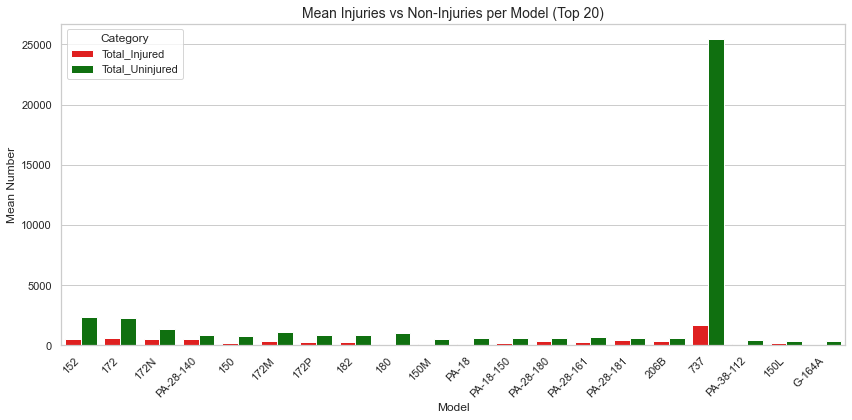

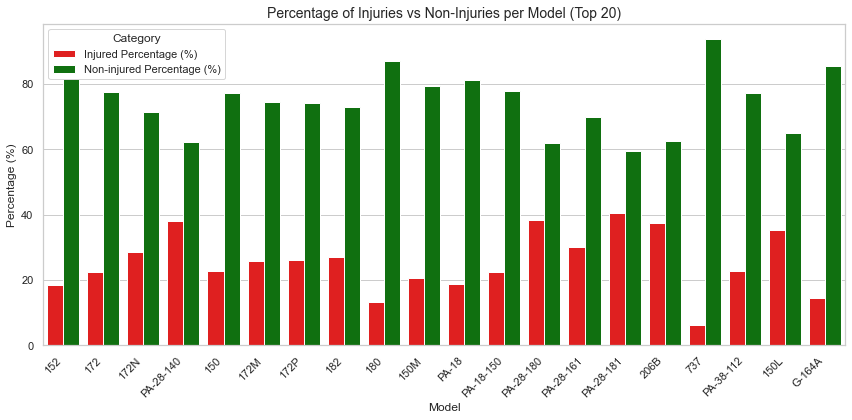

In [46]:
import seaborn as sns

# Bar Graph: Total Numbers of Each Model using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_models.index, y='Total_Model', data=top_20_models.reset_index(), palette='Blues_d')
plt.title('Total Number of Incidents per Model (Top 20)', fontsize=14)
plt.ylabel('Total Number of Incidents', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Bar Graph: Mean Injuries vs Non-Injuries per Top 20 Models using Seaborn
plt.figure(figsize=(12, 6))
injuries_uninjuries = top_20_models[['Total_Injured', 'Total_Uninjured']].reset_index().melt(
id_vars='Model', var_name='Category', value_name='Mean'
)
sns.barplot(x='Model', y='Mean', hue='Category', data=injuries_uninjuries, palette=['red', 'green'])
plt.title('Mean Injuries vs Non-Injuries per Model (Top 20)', fontsize=14)
plt.ylabel('Mean Number', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

# Bar Graph: Percent of Injuries vs Non-Injuries per Top 20 Models using Seaborn
plt.figure(figsize=(12, 6))
percentages = top_20_models[['Injured Percentage (%)', 'Non-injured Percentage (%)']].reset_index().melt(
    id_vars='Model', var_name='Category', value_name='Percentage'
)
sns.barplot(x='Model', y='Percentage', hue='Category', data=percentages, palette=['red', 'green'])
plt.title('Percentage of Injuries vs Non-Injuries per Model (Top 20)', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

### Broad.Phase.of.Flight

#### **Analysis made on the Table**
**Insights and Key Observations**
- Maneuvering and go-around are riskiest with high injury rates, while taxi and standing are safest. Landing has frequent incidents, but injury risk is low.

**Overall Interpretation:**
- Focus on improving safety in high-risk phases (maneuvering, go-around, cruise) while maintaining effective protocols for landing. Taxi and standing remain low-risk, requiring minimal intervention.

In [47]:
# Group by 'Broad.phase.of.flight' and calculate required statistics
Phase_summary = Aviation_df.groupby('Broad.phase.of.flight').agg(
    Total_Injured=('Total.injured', 'sum'),
    Total_Uninjured=('Total.Uninjured', 'sum'),
    Total_Times_Mentioned=('Broad.phase.of.flight', 'count')
)

# Calculate Injured and Non-injured Percentages
Phase_summary['Injured Percentage (%)'] = Phase_summary['Total_Injured'] / Phase_summary[['Total_Injured', 'Total_Uninjured']].sum(axis=1) * 100
Phase_summary['Non-injured Percentage (%)'] = Phase_summary['Total_Uninjured'] / Phase_summary[['Total_Injured', 'Total_Uninjured']].sum(axis=1) * 100

# Sort by 'Total_Times' and display top 10 results
sorted_Phase_summary = Phase_summary.sort_values('Total_Times_Mentioned', ascending=False).head(10)

sorted_Phase_summary


,Total_Injured,Total_Uninjured,Total_Times_Mentioned,Injured Percentage (%),Non-injured Percentage (%)
Broad.phase.of.flight,,,,,
Landing,1437.0,48533.0,15428,2.875725,97.124275
Takeoff,6010.0,45083.0,12493,11.762864,88.237136
Cruise,6836.0,45757.0,10269,12.997927,87.002073
Maneuvering,5836.0,5447.0,8144,51.723832,48.276168
Approach,4865.0,21538.0,6546,18.425936,81.574064
Climb,2025.0,19508.0,2034,9.404170,90.595830
Taxi,182.0,38277.0,1958,0.473231,99.526769
Descent,1168.0,18958.0,1887,5.803438,94.196562
Go-around,802.0,2045.0,1353,28.170004,71.829996


#### **Anaylisis made on the Graphs**
**Insights and Key Observations:**
- **Landing Phase:** Aircraft models like "152" and "172" exhibit a high number of incidents during landing, contributing significantly to the overall total.

- **Takeoff Phase:** The takeoff phase has a consistent share of incidents across most aircraft, with the "152" model standing out as having the highest proportion of takeoff-related accidents.

- **Cruise Phase:** The cruise phase appears to account for a large portion of incidents in models such as "172N," "PA-28-140," and "180." This suggests that cruise-related challenges are prominent for these models.

**Overall Interpretation:**
- **Landing Focus:** Aircraft models such as "152" require enhanced landing safety protocols, given the substantial incident numbers during this phase.

- **Cruise Safety:** Models like "172N" and "PA-28-140" should prioritize cruise safety measures to mitigate risks associated with long-distance flight.

- **Takeoff Attention:** While less frequent than landing and cruise incidents, takeoff incidents still demand attention, particularly for the "152" model.

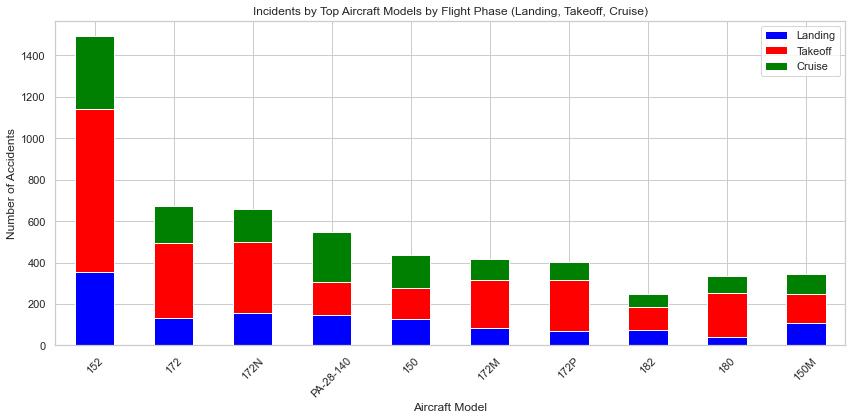

In [48]:
# Filter dataset for critical phases (Landing, Takeoff)
most_phases = ['Landing', 'Takeoff', 'Cruise']
phase_filtered = Aviation_df[Aviation_df['Broad.phase.of.flight'].isin(most_phases)]

# Count accidents by model and flight phase
phase_model_counts = phase_filtered.groupby(['Model', 'Broad.phase.of.flight']).size().unstack().fillna(0)

# Select top models for analysis
top_10_models = top_20_models.head(10).index
phase_model_counts = phase_model_counts.loc[top_10_models]

# Plot accidents by model and phase
phase_model_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['Blue', 'Red', 'Green'])
plt.title("Incidents by Top Aircraft Models by Flight Phase (Landing, Takeoff, Cruise)")
plt.xlabel("Aircraft Model")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.legend(["Landing", "Takeoff", 'Cruise'], loc="upper right")
plt.tight_layout()
plt.show()

### Weather.Condition

**Analyisis Made on the Table & Graph below**
- **Data Breakdown:** VMC conditions show a low injury rate of 10.75%, indicating safer traffic incidents in clear weather, while IMC conditions exhibit a higher injury rate of 22.37%, reflecting the increased risk associated with poor visibility and weather.

- **Comparing VMC & IMC:** The injury rate is notably lower in VMC (10.75%) compared to IMC (22.37%), highlighting that clearer weather leads to fewer injuries. Despite both conditions having high non-injured percentages, IMC is more hazardous with increased injury likelihood.

- **Made Conclusion:** Clearer weather (VMC) results in fewer injuries, while poor visibility and adverse weather (IMC) increase the likelihood of injury, emphasizing the importance of weather conditions in traffic safety and the need for caution in less favorable weather.

In [49]:
# Group by 'Weather.Condition' and calculate required statistics
Weather_summary = Aviation_df.groupby('Weather.Condition').agg(
    Total_Injured=('Total.injured', 'sum'),
    Total_Uninjured=('Total.Uninjured', 'sum'),
    Total_Times=('Weather.Condition', 'size')
)

# Calculate Injured and Non-injured Percentages
Weather_summary[['Injured Percentage (%)', 'Non-injured Percentage (%)']] = (
    Weather_summary[['Total_Injured', 'Total_Uninjured']]
    .div(Weather_summary[['Total_Injured', 'Total_Uninjured']].sum(axis=1), axis=0) * 100
)

# Sort by 'Total_Times' and display top 10 results
Weather_summary.sort_values('Total_Times', ascending=False).head(10)


,Total_Injured,Total_Uninjured,Total_Times,Injured Percentage (%),Non-injured Percentage (%)
Weather.Condition,,,,,
VMC,36539.0,303449.0,77303,10.747144,89.252856
IMC,11437.0,39684.0,5976,22.372411,77.627589
UNK,2279.0,10301.0,856,18.116057,81.883943
Unk,457.0,7041.0,262,6.094959,93.905041


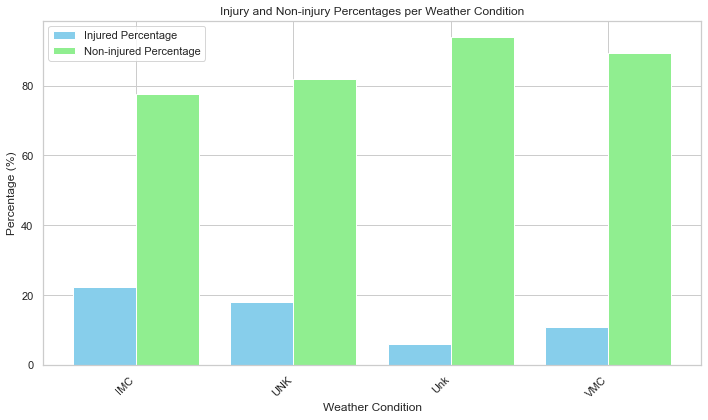

In [50]:
import numpy as np

# Plotting the bar chart for Injury and Non-injury Percentages per Weather Condition
x = np.arange(len(Weather_summary.index))  # Create an array for the x-axis positions
width = 0.4  # Width of the bars

plt.figure(figsize=(10, 6))

# Bar for Injured Percentage
plt.bar(x - width/2, Weather_summary['Injured Percentage (%)'], width, color='skyblue', label='Injured Percentage')

# Bar for Non-injured Percentage
plt.bar(x + width/2, Weather_summary['Non-injured Percentage (%)'], width, color='lightgreen', label='Non-injured Percentage')

# Adding labels and title
plt.xlabel('Weather Condition')
plt.ylabel('Percentage (%)')
plt.title('Injury and Non-injury Percentages per Weather Condition')
plt.xticks(x, Weather_summary.index, rotation=45, ha='right')  # Add weather conditions as x-axis labels
plt.legend()

# Adjust layout to avoid clipping
plt.tight_layout()

# Display the plot
plt.show()


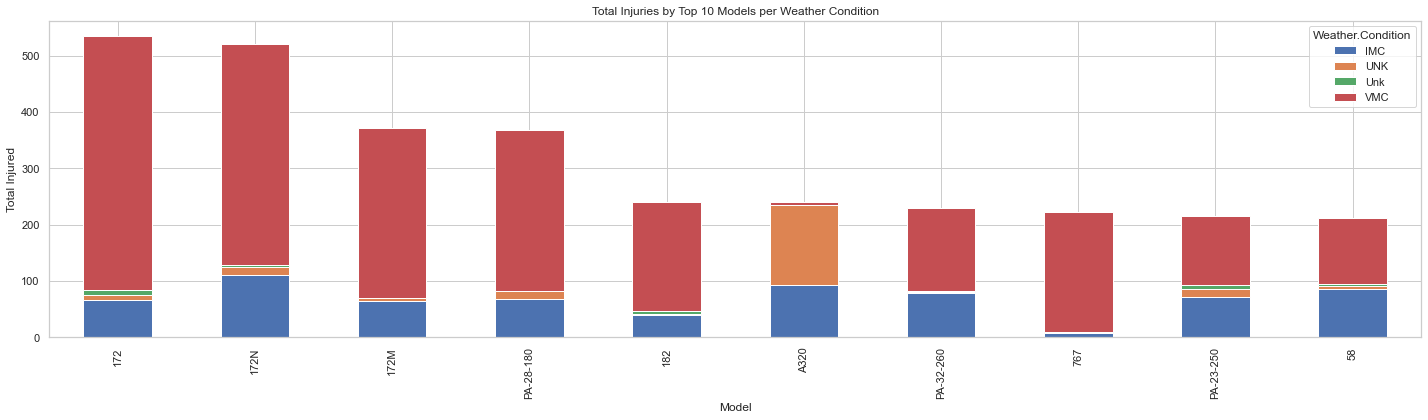

In [54]:
import matplotlib.pyplot as plt

# Create a pivot table for Total.Injured by Model per Weather.Condition
pivot_table2 = Aviation_df.pivot_table(
    values='Total.injured', 
    index='Model', 
    columns='Weather.Condition', 
    aggfunc='sum'
).dropna()

# Calculate the total number of accidents (Total Injured) for each model
pivot_table2['Total.Injured'] = pivot_table2.sum(axis=1)

# Sort the models by the total number of injuries (for each weather condition) and get the top 10
top_10_models = pivot_table2['Total.Injured'].sort_values(ascending=False).head(10).index
pivot_table2 = pivot_table2.loc[top_10_models]

# Plot the bar graph
pivot_table2.drop(columns='Total.Injured').plot(kind='bar', stacked=True, figsize=(20, 6))

# Add title and labels
plt.title('Total Injuries by Top 10 Models per Weather Condition')
plt.xlabel('Model')
plt.ylabel('Total Injured')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()



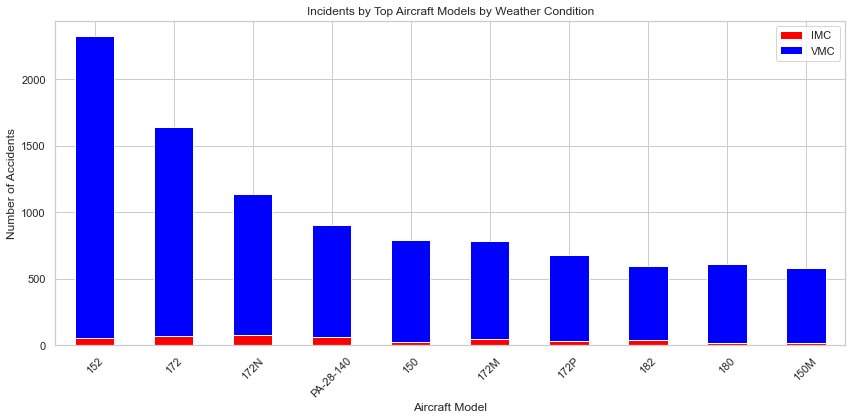

In [57]:
# Filter dataset for critical weather condtion (IMV, VMC)
most_phases = ['IMC', 'VMC']
phase_filtered = Aviation_df[Aviation_df['Weather.Condition'].isin(most_phases)]

# Count accidents by model and weather condition
phase_model_counts = phase_filtered.groupby(['Model', 'Weather.Condition']).size().unstack().fillna(0)

# Select top models for analysis
top_10_models = top_20_models.head(10).index
phase_model_counts = phase_model_counts.loc[top_10_models]

# Plot accidents by model and phase
phase_model_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['Red', 'Blue'])
plt.title("Incidents by Top Aircraft Models by Weather Condition")
plt.xlabel("Aircraft Model")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.legend(["IMC", "VMC", 'Cruise'], loc="upper right")
plt.tight_layout()
plt.show()

**Injuries Graph Analysis**
- **Weather Conditions:** VMC accounts for most injuries across models, emphasizing risks from operational or mechanical factors over weather. IMC injuries, present only in the 737, 182, and PA-28-180, remain minimal.

- **Aircraft Models:** General aviation models show injuries almost entirely under VMC, pointing to non-weather-related causes. The 737 reports significant injuries under both VMC and IMC, reflecting challenges in commercial aviation.

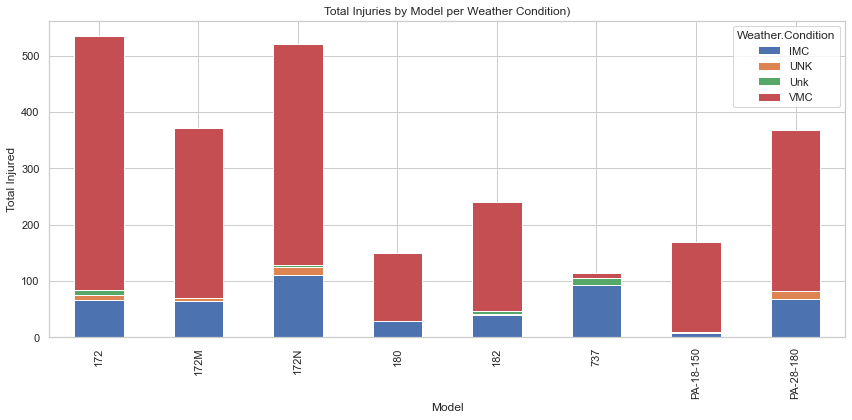

In [32]:
import matplotlib.pyplot as plt

# Get the top 20 models based on the count of occurrences in Model_summary
top_20_models = Model_summary.sort_values('Total_Model', ascending=False).head(20).index

# Filter Aviation_df to include only rows where 'Model' is in the top 20 models
Aviation_df['top_20_models'] = Aviation_df['Model'].where(Aviation_df['Model'].isin(top_20_models))

# Drop rows where the 'top_20_models' column is NaN (i.e., models not in the top 20)
Aviation_df_filtered = Aviation_df.dropna(subset=['top_20_models'])

# Create a pivot table for Total.Injured by Model per Weather.Condition
pivot_table2 = Aviation_df_filtered.pivot_table(
    values='Total.injured', 
    index='top_20_models', 
    columns='Weather.Condition', 
    aggfunc='sum'
).dropna()

# Plot the bar graph
pivot_table2.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add title and labels
plt.title('Total Injuries by Model per Weather Condition)')
plt.xlabel('Model')
plt.ylabel('Total Injured')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()


**Non-Injuries Graph Analysis**
- **Weather Conditions:** VMC incidents dominate across all models, indicating favorable weather does not prevent non-injury occurrences. IMC incidents are minimal, found only in the 737, suggesting effective weather handling in most cases.

- **Aircraft Models:** General aviation models (e.g., 172 series, PA-18-150) show far fewer non-injuries than the 737, with all incidents occurring under VMC. The 737's higher count reflects its operational scope.

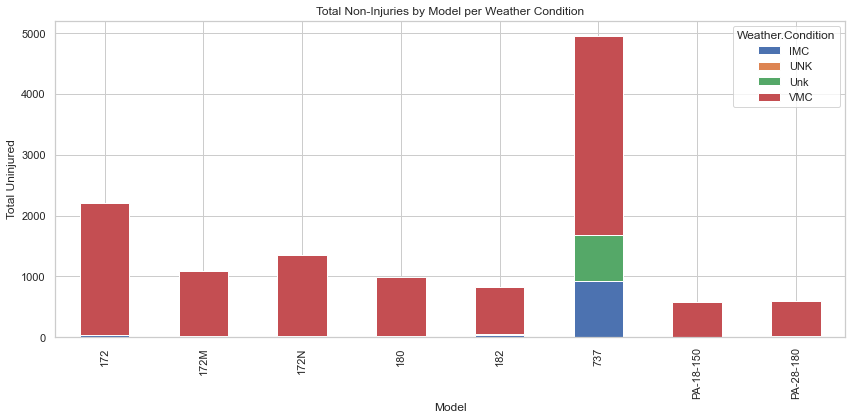

In [39]:
import matplotlib.pyplot as plt

# Get the top 20 models based on the count of occurrences in Model_summary
top_20_models = Model_summary.sort_values('Total_Model', ascending=False).head(20).index

# Filter Aviation_df to include only rows where 'Model' is in the top 20 models
Aviation_df['top_20_models'] = Aviation_df['Model'].where(Aviation_df['Model'].isin(top_20_models))

# Drop rows where the 'top_20_models' column is NaN (i.e., models not in the top 20)
Aviation_df_filtered = Aviation_df.dropna(subset=['top_20_models'])

# Create a pivot table for Total.Injured by Model per Weather.Condition
pivot_table3 = Aviation_df_filtered.pivot_table(
    values='Total.Uninjured', 
    index='top_20_models', 
    columns='Weather.Condition', 
    aggfunc='sum'
).dropna()

# Plot the bar graph
pivot_table3.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add title and labels
plt.title('Total Non-Injuries by Model per Weather Condition')
plt.xlabel('Model')
plt.ylabel('Total Uninjured')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()


## Other Datasets

### Make

**Analysis made based on the Table & Graphs below**
- **Way More Incidencies, Way Lower Injury Rate:** Aircraft like Boeing and Grumman have relatively low injury rates despite a high number of incidents, indicating they may be safer in terms of injuries in comparison to other makes.

- **Highest Risk:** Aircraft like Bell, Mooney, and Piper exhibit higher injury rates, particularly in relation to their total incidents, which may suggest that these makes might have a higher risk associated with injuries.

- **Further Invesigations Needed:** The dataset highlights significant variation in injury rates across different makes, with some aircraft types showing much higher injury rates than others, which may warrant further investigation into the underlying causes (e.g., design, usage frequency, types of incidents, or operational environments).

In [34]:
Aviation_df['Make'] = Aviation_df['Make'].str.strip().str.lower()

# Group by 'Make' and calculate all required statistics in one step
Make_summary = Aviation_df.groupby('Make').agg(
    Total_Injured=('Total.injured', 'sum'),
    Total_Uninjured=('Total.Uninjured', 'sum'),
    Total_Uses=('Make', 'size')  # Count occurrences of each model
)

# Add percentage columns for injuries and non-injuries
Make_summary['Injured Percentage (%)'] = (
    Make_summary['Total_Injured'] / 
    (Make_summary['Total_Injured'] + Make_summary['Total_Uninjured']) * 100
)
Make_summary['Non-injured Percentage (%)'] = (
    Make_summary['Total_Uninjured'] / 
    (Make_summary['Total_Injured'] + Make_summary['Total_Uninjured']) * 100
)

# Sort by 'Total_Uses' for the most frequently used models
sorted_Make_summary = Make_summary.sort_values(by='Total_Uses', ascending=False)

# Display the summary
print("Portion of Injured vs Non-Injured by Make Category:")
sorted_Make_summary.head(10)

Portion of Injured vs Non-Injured by Make Category:


,Total_Injured,Total_Uninjured,Total_Uses,Injured Percentage (%),Non-injured Percentage (%)
Make,,,,,
cessna,12425.0,34423.0,27149,26.521943,73.478057
piper,8547.0,17832.0,14870,32.400773,67.599227
beech,4105.0,7891.0,5372,34.219740,65.780260
boeing,8302.0,208375.0,2745,3.831510,96.168490
bell,1925.0,3072.0,2722,38.523114,61.476886
mooney,816.0,1303.0,1334,38.508731,61.491269
robinson,662.0,1132.0,1230,36.900780,63.099220
grumman,340.0,1229.0,1172,21.669853,78.330147
bellanca,489.0,930.0,1045,34.460888,65.539112


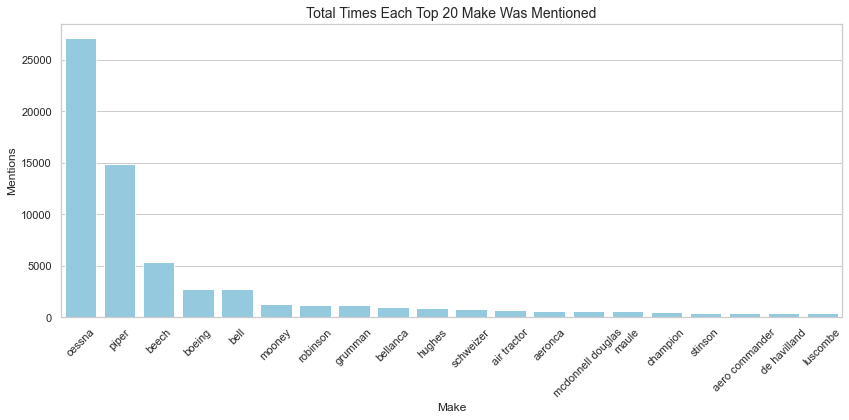

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Graph 1: Total Times Each Make Was Mentioned
plt.figure(figsize=(12, 6))
sns.barplot(data=sorted_Make_summary.head(20), x=sorted_Make_summary.head(20).index, y='Total_Uses', color='skyblue')
plt.title('Total Times Each Top 20 Make Was Mentioned', fontsize=14)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Mentions', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

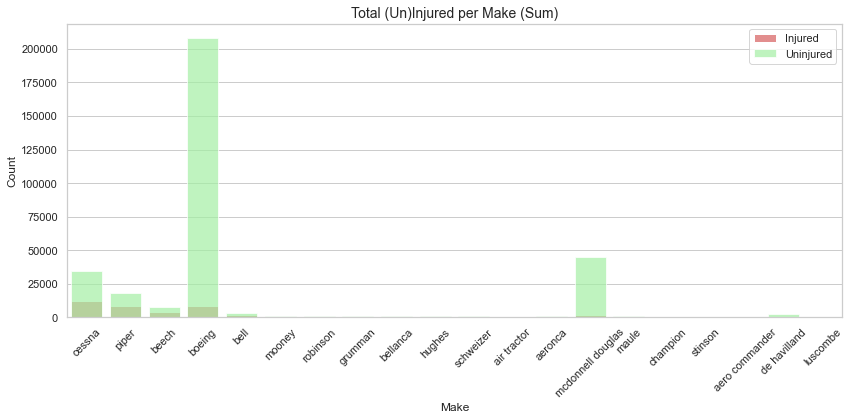

In [59]:
# Graph 2: Total Injured vs Uninjured (Sum)
plt.figure(figsize=(12, 6))
sns.barplot(data=sorted_Make_summary.head(20), x=sorted_Make_summary.head(20).index, y='Total_Injured', color='lightcoral', label='Injured')
sns.barplot(data=sorted_Make_summary.head(20), x=sorted_Make_summary.head(20).index, y='Total_Uninjured', color='palegreen', alpha=0.7, label='Uninjured')
plt.title('Total (Un)Injured per Make (Sum)', fontsize=14)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

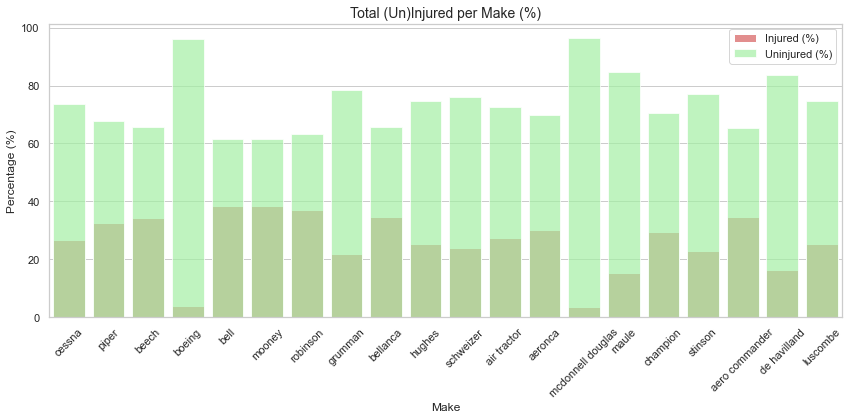

In [60]:
# Graph 3: Injured vs Uninjured Percentage
plt.figure(figsize=(12, 6))
sns.barplot(data=sorted_Make_summary.head(20), x=sorted_Make_summary.head(20).index, y='Injured Percentage (%)', color='lightcoral', label='Injured (%)')
sns.barplot(data=sorted_Make_summary.head(20), x=sorted_Make_summary.head(20).index, y='Non-injured Percentage (%)', color='palegreen', alpha=0.7, label='Uninjured (%)')
plt.title('Total (Un)Injured per Make (%)', fontsize=14)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

### Purpose.of.Flight

**Analysis on the Data**

This dataset provides valuable insights into the relationship between the purpose of flight and the injury risk associated with different aviation activities.
- ***Aerial Observation*** flights have the highest injury rate, potentially indicating the risks associated with surveillance or monitoring activities.

- ***Personal flights*** have a high number of incidents and injuries, suggesting that these are the most common but also the most dangerous type of flight in terms of injury rate.

- ***Instructional flights*** have the lowest injury rate, which could be due to the controlled and supervised nature of the flights
- ***Unknown flights*** have a very low injury rate, possibly due to a large number of incidents with minor or no injuries.

- ***Business, Positioning, and Other Work*** Use flights show moderate injury rates, reflecting the risks of more operational or commercial flights.

In [36]:
# Group by 'Make' and calculate all required statistics in one step
Purpose_summary = Aviation_df.groupby('Purpose.of.flight').agg(
    Total_Injured=('Total.injured', 'sum'),
    Total_Uninjured=('Total.Uninjured', 'sum'),
    Total_Times=('Purpose.of.flight', 'size')  # Count occurrences of each model
)

# Add percentage columns for injuries and non-injuries
Purpose_summary['Injured Percentage (%)'] = (
    Purpose_summary['Total_Injured'] / 
    (Purpose_summary['Total_Injured'] + Purpose_summary['Total_Uninjured']) * 100
)
Purpose_summary['Non-injured Percentage (%)'] = (
    Purpose_summary['Total_Uninjured'] / 
    (Purpose_summary['Total_Injured'] + Purpose_summary['Total_Uninjured']) * 100
)

# Sort by 'Total_Times' for the most frequently used models
sorted_Purpose_summary = Purpose_summary.sort_values(by='Total_Times', ascending=False)

# Display the summary
print("Portion of Injured vs Non-Injured by Weather.Condition:")
sorted_Purpose_summary.head(10)

Portion of Injured vs Non-Injured by Weather.Condition:


,Total_Injured,Total_Uninjured,Total_Times,Injured Percentage (%),Non-injured Percentage (%)
Purpose.of.flight,,,,,
Personal,25388.0,52052.0,49448,32.784091,67.215909
Instructional,2891.0,12580.0,10601,18.686575,81.313425
Unknown,11445.0,166487.0,6802,6.432233,93.567767
Aerial Application,997.0,2944.0,4712,25.298148,74.701852
Business,2857.0,6471.0,4018,30.628216,69.371784
Positioning,683.0,2122.0,1646,24.349376,75.650624
Other Work Use,749.0,1878.0,1264,28.511610,71.488390
Ferry,302.0,634.0,812,32.264957,67.735043
Aerial Observation,646.0,912.0,794,41.463415,58.536585


### Engine.Type

**Quick Analysis**

- **Reciprocating engines** have a high number of incidents (69,530) with a relatively high injury percentage (30.10%), indicating a moderate level of risk. Turbo Shaft engines have a higher injury rate (34.54%) with fewer incidents (3,609), reflecting a slightly riskier profile compared to reciprocating engines.

- **Turbo Prop engines** have the lowest injury percentage (13.69%), showing that they tend to be safer in terms of injuries despite a moderate number of incidents (3,391). Turbo Fan and Turbo Jet engines have very low injury rates (around 2.47% and 2.89%, respectively), suggesting these engine types are generally safer, despite fewer total incidents.

- **Geared Turbofan** engines show no reported injuries in the dataset, with a 100% non-injury rate. Electric engines and LR engines show higher injury rates (30% and 65.63%, respectively), though their total number of incidents is very low.

In [63]:
# Group by 'Engine.Type' and calculate required statistics in one step
Engine_summary = Aviation_df.groupby('Engine.Type').agg(
    Total_Injured=('Total.injured', 'sum'),
    Total_Uninjured=('Total.Uninjured', 'sum'),
    Total_Uses=('Engine.Type', 'size')
)

# Calculate Injured and Non-injured Percentages
Engine_summary['Injured Percentage (%)'] = Engine_summary['Total_Injured'] / (Engine_summary['Total_Injured'] + Engine_summary['Total_Uninjured']) * 100
Engine_summary['Non-injured Percentage (%)'] = Engine_summary['Total_Uninjured'] / (Engine_summary['Total_Injured'] + Engine_summary['Total_Uninjured']) * 100

# Sort by 'Total_Uses'
sorted_Engine_summary = Engine_summary.sort_values('Total_Uses', ascending=False)

# Display top 10 results
sorted_Engine_summary.head(10)



,Total_Injured,Total_Uninjured,Total_Uses,Injured Percentage (%),Non-injured Percentage (%)
Engine.Type,,,,,
Reciprocating,32408.0,75246.0,69530,30.103851,69.896149
Turbo Shaft,2563.0,4858.0,3609,34.537124,65.462876
Turbo Prop,2670.0,16835.0,3391,13.688798,86.311202
Turbo Fan,5357.0,211048.0,2481,2.475451,97.524549
Unknown,4377.0,12794.0,2051,25.490653,74.509347
Turbo Jet,1014.0,34072.0,703,2.890042,97.109958
None,13.0,90.0,19,12.621359,87.378641
Geared Turbofan,0.0,121.0,12,0.000000,100.000000
Electric,3.0,7.0,10,30.000000,70.000000
